In [1]:
import trig_poly
import dual_certificates
import test_data
import numpy as np
import plt_util
import phase_transition
from matplotlib import pyplot as plt

%matplotlib inline

In [102]:
reload(test_data)
reload(dual_certificates)
reload(trig_poly)

m = 10
fc = 50
min_separation = 0.9 / fc
N = int(1.0 / min_separation)

kernel = trig_poly.TrigPoly.dirichlet(fc)

support = test_data.jittered_supports(N, min_separation=min_separation)
sign_pattern = test_data.uniform_sign_pattern_multidim(N, m)

In [110]:
derivatives = np.random.normal(size=(N, m)) + 1j * np.random.normal(size=(N, m))
# derivatives = np.zeros((N, m))

In [97]:
time_deltas = np.outer(support, np.ones(N)) - np.outer(np.ones(N), support)

kernel_1 = kernel.derivative()
kernel_2 = kernel_1.derivative()

kernel_values = kernel(time_deltas)
kernel_1_values = kernel_1(time_deltas)
kernel_2_values = kernel_2(time_deltas)

multiplier = 100.0
problem_mx = np.bmat([
    [kernel_values, kernel_1_values / multiplier],
    [kernel_1_values / multiplier, kernel_2_values / multiplier / multiplier]])

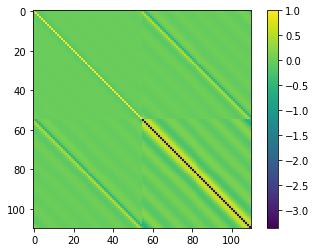

In [98]:
plt.imshow(problem_mx.real)
plt.colorbar()

In [100]:
np.linalg.eigvals(problem_mx)

array([ -5.11537934e+00 -7.63784631e-26j,
        -5.08431675e+00 +5.13392605e-26j,
        -4.94526655e+00 -1.08925378e-21j,
        -4.91966186e+00 -3.54087577e-23j,
        -4.78615418e+00 -1.85546381e-15j,
        -4.76613002e+00 -8.08272635e-16j,
        -4.62207572e+00 +2.01353154e-20j,
        -4.63703205e+00 -2.64579761e-20j,
        -4.48688774e+00 -1.09940252e-19j,
        -4.49738374e+00 +1.86591948e-19j,
        -4.36023695e+00 -7.69635356e-20j,
        -4.36686140e+00 -3.15890259e-20j,
        -4.24190043e+00 -2.85816135e-23j,
        -4.24519286e+00 +2.95395776e-21j,
        -4.13169976e+00 +1.00232402e-18j,
        -4.13214448e+00 +2.12357793e-18j,
        -4.02947509e+00 +4.58849667e-16j,
        -4.02750410e+00 +8.40327050e-16j,
        -3.93507340e+00 -8.48885339e-17j,
        -3.93107280e+00 -3.43601470e-16j,
        -3.84266101e+00 +2.91673515e-19j,
        -3.84834337e+00 +3.31636201e-18j,
        -3.76913348e+00 +6.78044357e-19j,
        -3.76208705e+00 +3.8712736

In [111]:
reload(dual_certificates)
interpolator = dual_certificates.interpolate_multidim_fixed_derivatives(support, sign_pattern, kernel, derivatives)

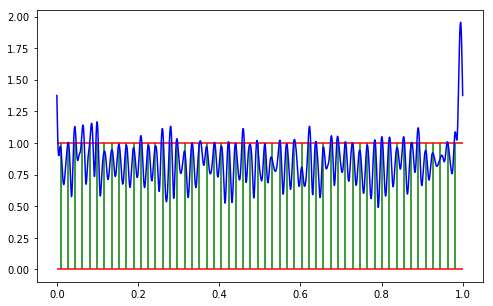

In [112]:
plt.subplots(figsize=(8, 5))

plt_util.plot_trig_poly_magnitude(interpolator)
plt_util.plot_support_magnitude_lines(support)
plt_util.plot_magnitude_bounds()

In [113]:
interpolator.derivative()(support[0])[:, 0]

array([  6.76244276 -0.78091725j, -13.40305816 -1.24655622j,
         6.07381082 -9.39251122j,   7.51468134 -4.8313001j ,
       -11.04734100 -2.35946847j,   1.05704295 -0.91143594j,
        10.36587571 -8.45308196j, -11.36052022 +9.39068149j,
         7.66802159-12.62444661j,   5.50444084 +6.29161457j])

In [114]:
for i in range(N):
    print np.linalg.norm(interpolator.derivative()(support[i])[:, 0] - derivatives[i, :])

35.9456818016
108.70676237
108.634566009
135.430121379
159.170652478
44.3247735924
72.1030796838
34.5764411403
33.5430186318
43.6737203917
39.2196367479
27.254158678
41.4401554209
80.8888133145
58.291898808
76.5992547768
93.72738498
35.1700121702
48.7877037701
47.2108143854
25.142365674
61.7677747375
65.5908980593
55.5024459102
55.1271509099
29.7134874673
104.621369675
112.567194889
25.7555776724
36.7961061839
67.8526919134
58.0237711649
96.2399703473
36.8294121079
101.573838727
93.8941736804
35.2378294667
86.2820050133
97.5886598511
34.9498868587
70.9949460488
55.8489682767
24.0443010286
41.520921937
20.6283517634
33.8918786442
52.0025826909
46.5775979719
88.223968328
41.5239107927
52.102886654
81.1050137184
70.9939638171
75.8118835701
74.291979058
